# Regression Analysis

### 1. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Loading the data

In [2]:
unemployment = pd.read_csv('/Users/usmanali/Uwindsor/Forth/Project/Data Collection/Historic Data of Economical Indicators/Unemployement Rate.csv')
stocks_data = pd.read_csv('/Users/usmanali/Uwindsor/Forth/Project/Data Collection/Historic Data of Economical Indicators/Stock Exchange Index.csv')
RD_spending_data = pd.read_csv('/Users/usmanali/Uwindsor/Forth/Project/Data Collection/Historic Data of Economical Indicators/R&D Spending in Canada.csv')
productivity_data = pd.read_csv('/Users/usmanali/Uwindsor/Forth/Project/Data Collection/Historic Data of Economical Indicators/Labour Productivity rate.csv')
interest_rate = pd.read_csv('/Users/usmanali/Uwindsor/Forth/Project/Data Collection/Historic Data of Economical Indicators/interest_rate.csv')
gdp = pd.read_csv('/Users/usmanali/Uwindsor/Forth/Project/Data Collection/Historic Data of Economical Indicators/GDP.csv')
cpi = pd.read_csv('/Users/usmanali/Uwindsor/Forth/Project/Data Collection/Historic Data of Economical Indicators/CPI.csv')
consumer_confidence = pd.read_csv('/Users/usmanali/Uwindsor/Forth/Project/Data Collection/Historic Data of Economical Indicators/Consumer Confidence Index.csv')

In [151]:
dependent = pd.read_csv('/Users/usmanali/Uwindsor/Forth/Project/Data Collection/Historic Data of Economical Indicators/Banking_dependent_event.csv')

### 3. Data Cleaning

,DATE,unemployement_rate,Date
0,1955-01-01,4.8,1955
1,1955-02-01,4.7,1955
2,1955-03-01,4.9,1955
3,1955-04-01,4.5,1955
4,1955-05-01,4.5,1955
...,...,...,...
831,2024-04-01,6.1,2024
832,2024-05-01,6.2,2024
833,2024-06-01,6.4,2024
834,2024-07-01,6.4,2024


In [4]:
#Data Cleaning for Unemployement dataset
unemployment1 = unemployment
#Rename the columns
unemployment1.rename(columns = {'LRUNTTTTCAM156S' : 'unemployement_rate'},inplace=True)
unemployment1
#Get the correct Date
unemployment1['DATE'] = pd.to_datetime(unemployment1['DATE'])
unemployment1['Date'] = unemployment1['DATE'].dt.year

#Get the data for each year
unemployment1 = round(unemployment1.groupby(['Date'])['unemployement_rate'].mean(),2).reset_index()
unemployment1

,Date,unemployement_rate
0,1955,4.28
1,1956,3.30
2,1957,4.75
3,1958,7.13
4,1959,5.88
...,...,...
65,2020,9.72
66,2021,7.48
67,2022,5.27
68,2023,5.41


In [5]:
#Stock Data Cleaning
stocks_data1 = stocks_data
#Get the related columns
stocks_data1 = stocks_data1[['REF_DATE','VALUE']]
#Transform the data
stocks_data1['REF_DATE'] = pd.to_datetime(stocks_data1['REF_DATE'])
stocks_data1['Date'] = stocks_data1['REF_DATE'].dt.year
#Get the mean values
stocks_data1 = round(stocks_data1.groupby(['Date'])['VALUE'].mean(),2).reset_index()
stocks_data1 = stocks_data1.rename(columns= {'VALUE': "stock_value"})
stocks_data1

/var/folders/b2/pn6h715x3rz171jbp1s72snr0000gn/T/ipykernel_98137/1725370335.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stocks_data1['REF_DATE'] = pd.to_datetime(stocks_data1['REF_DATE'])
/var/folders/b2/pn6h715x3rz171jbp1s72snr0000gn/T/ipykernel_98137/1725370335.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stocks_data1['Date'] = stocks_data1['REF_DATE'].dt.year


,Date,stock_value
0,1956,570.94
1,1957,532.03
2,1958,495.15
3,1959,562.13
4,1960,513.79
...,...,...
63,2019,3750.48
64,2020,3683.18
65,2021,4537.20
66,2022,4639.44


In [6]:
#R&D data cleaning
RD_spending_data1 = RD_spending_data
#Data for canada
RD_spending_data1 = RD_spending_data1[RD_spending_data1['Country Name'] == 'Canada']

#Relevent columns
RD_spending_data1 = RD_spending_data1.drop(['Country Code','Indicator Name','Indicator Code'], axis= 1)
#Drop null values
RD_spending_data1.dropna(axis=1,inplace=True)
#Get the same columns for date
RD_spending_data1 = pd.melt(RD_spending_data1, id_vars=["Country Name"], var_name="Year", value_name="Value")
#Get the related columns
RD_spending_data1 = RD_spending_data1[['Year','Value']]
RD_spending_data1['Year'] = pd.to_datetime(RD_spending_data1['Year'])
RD_spending_data1['Year'] = RD_spending_data1['Year'].dt.year
RD_spending_data1 = RD_spending_data1.rename(columns = {'Value' : 'R&D Spending'})
RD_spending_data1

,Year,R&D Spending
0,1996,1.606820
1,1997,1.613860
2,1998,1.710510
3,1999,1.749850
4,2000,1.858480
5,2001,2.021170
6,2002,1.971710
7,2003,1.967810
8,2004,1.997340
9,2005,1.971270


In [7]:
#Productivity data cleaning
productivity_data1 = productivity_data
#Get the specific data and columns by filtering
productivity_data1 = productivity_data1[productivity_data1['Industry'] == 'Finance and insurance, and holding companies [BS5B]'][['REF_DATE','VALUE']]

productivity_data1 = productivity_data1.reset_index()[['REF_DATE','VALUE']]
productivity_data1 = productivity_data1.rename(columns = {'VALUE' : 'labour_productivity'})
productivity_data1

,REF_DATE,labour_productivity
0,1997,50.0
1,1998,53.4
2,1999,53.5
3,2000,53.1
4,2001,54.9
5,2002,57.4
6,2003,57.8
7,2004,58.0
8,2005,58.1
9,2006,61.0


In [8]:
#interest_rate
interest_rate

,Date,Interest
0,1995,5.56
1,1996,2.75
2,1997,4.35
3,1998,5.05
4,1999,4.75
5,2000,5.75
6,2001,2.25
7,2002,2.75
8,2003,2.75
9,2004,2.50


In [9]:
#GDP Data Cleaning
gdp1 = gdp
gdp1 = gdp1[gdp1['North American Industry Classification System (NAICS)'] == 'Finance and insurance [52]'][['REF_DATE','VALUE']]

#Covert into datetime
gdp1['REF_DATE'] = pd.to_datetime(gdp1['REF_DATE'])
gdp1['Date'] = gdp1['REF_DATE'].dt.year
gdp1 = gdp1.groupby(['Date'])['VALUE'].mean().reset_index()
gdp1 = gdp1.rename(columns = {'VALUE':'GDP'})
gdp1

,Date,GDP
0,1997,68998.083333
1,1998,70986.916667
2,1999,74535.833333
3,2000,78012.333333
4,2001,81636.000000
5,2002,83339.083333
6,2003,84585.750000
7,2004,89022.916667
8,2005,92295.833333
9,2006,99763.666667


In [10]:
#CPI Data Cleaning
cpi1 = cpi
cpi1 = cpi1[cpi1['Products and product groups'] == 'All-items'][['REF_DATE','VALUE']]
cpi1['Date'] = pd.to_datetime(cpi1['REF_DATE'], format = '%Y')
cpi1['Date'] = cpi1['Date'].dt.year
cpi1 = cpi1[['Date','VALUE']]
cpi1 = cpi1.rename(columns = {'VALUE' : 'CPI'})
cpi1

,Date,CPI
0,1950,12.5
1,1951,13.8
2,1952,14.2
3,1953,14.0
4,1954,14.1
...,...,...
69,2019,136.0
70,2020,137.0
71,2021,141.6
72,2022,151.2


In [11]:
#Data cleaning for consumer confidence
consumer_confidence1 = consumer_confidence
consumer_confidence1['Category'] = pd.to_datetime(consumer_confidence1['Category'])
consumer_confidence1['Date'] = consumer_confidence1['Category'].dt.year
consumer_confidence1 = consumer_confidence1.groupby(['Date'])['OECD'].mean().reset_index()
consumer_confidence1 = consumer_confidence1.rename(columns= {'OECD' : 'consumer_confidence'})
consumer_confidence1

,Date,consumer_confidence
0,1974,98.605736
1,1975,99.461854
2,1976,100.941633
3,1977,101.138500
4,1978,101.454275
5,1979,100.212807
6,1980,98.980588
7,1981,98.753811
8,1982,98.827227
9,1983,100.291151


### Join the tables to make it in one dataframe

In [152]:
#Data Cleaning for dependent events
dependent['Year'] = pd.to_datetime(dependent['Year'])
dependent['Year'] = dependent['Year'].dt.year

In [153]:
merged_data = unemployment1.merge(stocks_data1, on= 'Date', how = 'left')
merged_data = merged_data.merge(RD_spending_data1, left_on= 'Date', right_on= 'Year', how = 'right')
merged_data = merged_data.merge(productivity_data1, left_on= 'Date', right_on= 'REF_DATE', how = 'right')
merged_data = merged_data.merge(interest_rate, on = 'Date', how= 'left')
merged_data = merged_data.merge(gdp1, on = 'Date', how = 'left')
merged_data = merged_data.merge(cpi1, on = 'Date', how = 'left')
merged_data = merged_data.merge(consumer_confidence1, on = 'Date', how = 'left')
merged_data = merged_data.merge(dependent, left_on = 'Date', right_on = 'Year', how = 'left')
merged_data

,Date,unemployement_rate,stock_value,Year_x,R&D Spending,REF_DATE,labour_productivity,Interest,GDP,CPI,consumer_confidence,Year_y,Technology,Stage,Prediction Value
0,1997,9.09,4086.23,1997,1.613860,1997,50.0,4.35,68998.083333,90.4,101.270150,1997,ATM Machines,Established,4
1,1997,9.09,4086.23,1997,1.613860,1997,50.0,4.35,68998.083333,90.4,101.270150,1997,Credit Card Processing Systems,Established,4
2,1997,9.09,4086.23,1997,1.613860,1997,50.0,4.35,68998.083333,90.4,101.270150,1997,Online Banking,Emerging,2
3,1998,8.29,1535.88,1998,1.710510,1998,53.4,5.05,70986.916667,91.3,101.451892,1998,ATM Machines,Established,4
4,1998,8.29,1535.88,1998,1.710510,1998,53.4,5.05,70986.916667,91.3,101.451892,1998,Credit Card Processing Systems,Established,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,2023,5.41,4649.78,2023,1.740393,2023,87.3,5.00,157319.500000,157.1,98.218963,2023,AI,Growing,3
114,2023,5.41,4649.78,2023,1.740393,2023,87.3,5.00,157319.500000,157.1,98.218963,2023,Clound Banking,Growing,3
115,2023,5.41,4649.78,2023,1.740393,2023,87.3,5.00,157319.500000,157.1,98.218963,2023,Robotic Process Automation,Emerging,2
116,2023,5.41,4649.78,2023,1.740393,2023,87.3,5.00,157319.500000,157.1,98.218963,2023,Digital Wallets,Growing,3


### Drop columns

In [154]:
final_merged_data = merged_data.drop(['Year_x','REF_DATE','Year_y'],axis=1)
final_merged_data

,Date,unemployement_rate,stock_value,R&D Spending,labour_productivity,Interest,GDP,CPI,consumer_confidence,Technology,Stage,Prediction Value
0,1997,9.09,4086.23,1.613860,50.0,4.35,68998.083333,90.4,101.270150,ATM Machines,Established,4
1,1997,9.09,4086.23,1.613860,50.0,4.35,68998.083333,90.4,101.270150,Credit Card Processing Systems,Established,4
2,1997,9.09,4086.23,1.613860,50.0,4.35,68998.083333,90.4,101.270150,Online Banking,Emerging,2
3,1998,8.29,1535.88,1.710510,53.4,5.05,70986.916667,91.3,101.451892,ATM Machines,Established,4
4,1998,8.29,1535.88,1.710510,53.4,5.05,70986.916667,91.3,101.451892,Credit Card Processing Systems,Established,4
...,...,...,...,...,...,...,...,...,...,...,...,...
113,2023,5.41,4649.78,1.740393,87.3,5.00,157319.500000,157.1,98.218963,AI,Growing,3
114,2023,5.41,4649.78,1.740393,87.3,5.00,157319.500000,157.1,98.218963,Clound Banking,Growing,3
115,2023,5.41,4649.78,1.740393,87.3,5.00,157319.500000,157.1,98.218963,Robotic Process Automation,Emerging,2
116,2023,5.41,4649.78,1.740393,87.3,5.00,157319.500000,157.1,98.218963,Digital Wallets,Growing,3


In [155]:
#Check point
final_data = final_merged_data.copy()
final_merged_data.to_csv('Tech Bubbles data.csv')


### Encode the data

In [156]:
#Encoding the Technology
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
final_data['Technology_en'] = le.fit_transform(final_data['Technology'])
final_data

,Date,unemployement_rate,stock_value,R&D Spending,labour_productivity,Interest,GDP,CPI,consumer_confidence,Technology,Stage,Prediction Value,Technology_en
0,1997,9.09,4086.23,1.613860,50.0,4.35,68998.083333,90.4,101.270150,ATM Machines,Established,4,1
1,1997,9.09,4086.23,1.613860,50.0,4.35,68998.083333,90.4,101.270150,Credit Card Processing Systems,Established,4,4
2,1997,9.09,4086.23,1.613860,50.0,4.35,68998.083333,90.4,101.270150,Online Banking,Emerging,2,7
3,1998,8.29,1535.88,1.710510,53.4,5.05,70986.916667,91.3,101.451892,ATM Machines,Established,4,1
4,1998,8.29,1535.88,1.710510,53.4,5.05,70986.916667,91.3,101.451892,Credit Card Processing Systems,Established,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,2023,5.41,4649.78,1.740393,87.3,5.00,157319.500000,157.1,98.218963,AI,Growing,3,0
114,2023,5.41,4649.78,1.740393,87.3,5.00,157319.500000,157.1,98.218963,Clound Banking,Growing,3,3
115,2023,5.41,4649.78,1.740393,87.3,5.00,157319.500000,157.1,98.218963,Robotic Process Automation,Emerging,2,9
116,2023,5.41,4649.78,1.740393,87.3,5.00,157319.500000,157.1,98.218963,Digital Wallets,Growing,3,5


In [157]:
#Encoding Bubbles 
final_data['Bubble_state'] = le.fit_transform(final_data['Stage'])
final_data

,Date,unemployement_rate,stock_value,R&D Spending,labour_productivity,Interest,GDP,CPI,consumer_confidence,Technology,Stage,Prediction Value,Technology_en,Bubble_state
0,1997,9.09,4086.23,1.613860,50.0,4.35,68998.083333,90.4,101.270150,ATM Machines,Established,4,1,2
1,1997,9.09,4086.23,1.613860,50.0,4.35,68998.083333,90.4,101.270150,Credit Card Processing Systems,Established,4,4,2
2,1997,9.09,4086.23,1.613860,50.0,4.35,68998.083333,90.4,101.270150,Online Banking,Emerging,2,7,1
3,1998,8.29,1535.88,1.710510,53.4,5.05,70986.916667,91.3,101.451892,ATM Machines,Established,4,1,2
4,1998,8.29,1535.88,1.710510,53.4,5.05,70986.916667,91.3,101.451892,Credit Card Processing Systems,Established,4,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,2023,5.41,4649.78,1.740393,87.3,5.00,157319.500000,157.1,98.218963,AI,Growing,3,0,3
114,2023,5.41,4649.78,1.740393,87.3,5.00,157319.500000,157.1,98.218963,Clound Banking,Growing,3,3,3
115,2023,5.41,4649.78,1.740393,87.3,5.00,157319.500000,157.1,98.218963,Robotic Process Automation,Emerging,2,9,1
116,2023,5.41,4649.78,1.740393,87.3,5.00,157319.500000,157.1,98.218963,Digital Wallets,Growing,3,5,3


In [158]:
#Check_point 
final_data1 = final_data.copy()

In [160]:
#Remove the columns
final_data.drop(['Technology', 'Date', 'Prediction Value', 'Stage'], axis = 1, inplace = True)
final_data

,unemployement_rate,stock_value,R&D Spending,labour_productivity,Interest,GDP,CPI,consumer_confidence,Technology_en,Bubble_state
0,9.09,4086.23,1.613860,50.0,4.35,68998.083333,90.4,101.270150,1,2
1,9.09,4086.23,1.613860,50.0,4.35,68998.083333,90.4,101.270150,4,2
2,9.09,4086.23,1.613860,50.0,4.35,68998.083333,90.4,101.270150,7,1
3,8.29,1535.88,1.710510,53.4,5.05,70986.916667,91.3,101.451892,1,2
4,8.29,1535.88,1.710510,53.4,5.05,70986.916667,91.3,101.451892,4,2
...,...,...,...,...,...,...,...,...,...,...
113,5.41,4649.78,1.740393,87.3,5.00,157319.500000,157.1,98.218963,0,3
114,5.41,4649.78,1.740393,87.3,5.00,157319.500000,157.1,98.218963,3,3
115,5.41,4649.78,1.740393,87.3,5.00,157319.500000,157.1,98.218963,9,1
116,5.41,4649.78,1.740393,87.3,5.00,157319.500000,157.1,98.218963,5,3


In [161]:
#Check point
data = final_data.copy()

## Model Design

<Axes: >

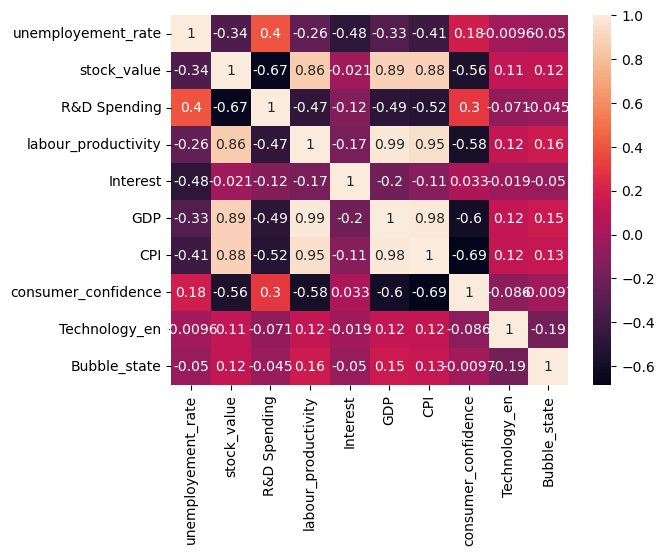

In [162]:
sns.heatmap(data.corr(), annot= True)

In [163]:
data['Bubble_state'].value_counts()

Bubble_state
2    80
3    20
0    10
1     8
Name: count, dtype: int64

In [164]:
#Divide data into dependent and independent variables
X = data.drop(['Bubble_state'], axis= 1)
y = data.iloc[:,-1:]

In [165]:
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

balanced_data = pd.DataFrame(X_resampled, columns=X.columns)
balanced_data['Bubble_State'] = y_resampled

In [166]:
balanced_data['Bubble_State'].value_counts()

Bubble_State
2    80
1    80
3    80
0    80
Name: count, dtype: int64

<Axes: >

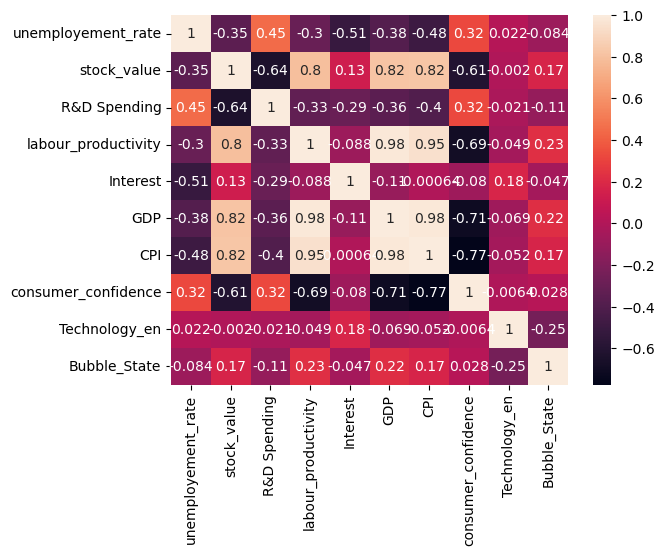

In [167]:
sns.heatmap(balanced_data.corr(), annot= True)

/Users/usmanali/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 500x500 with 0 Axes>

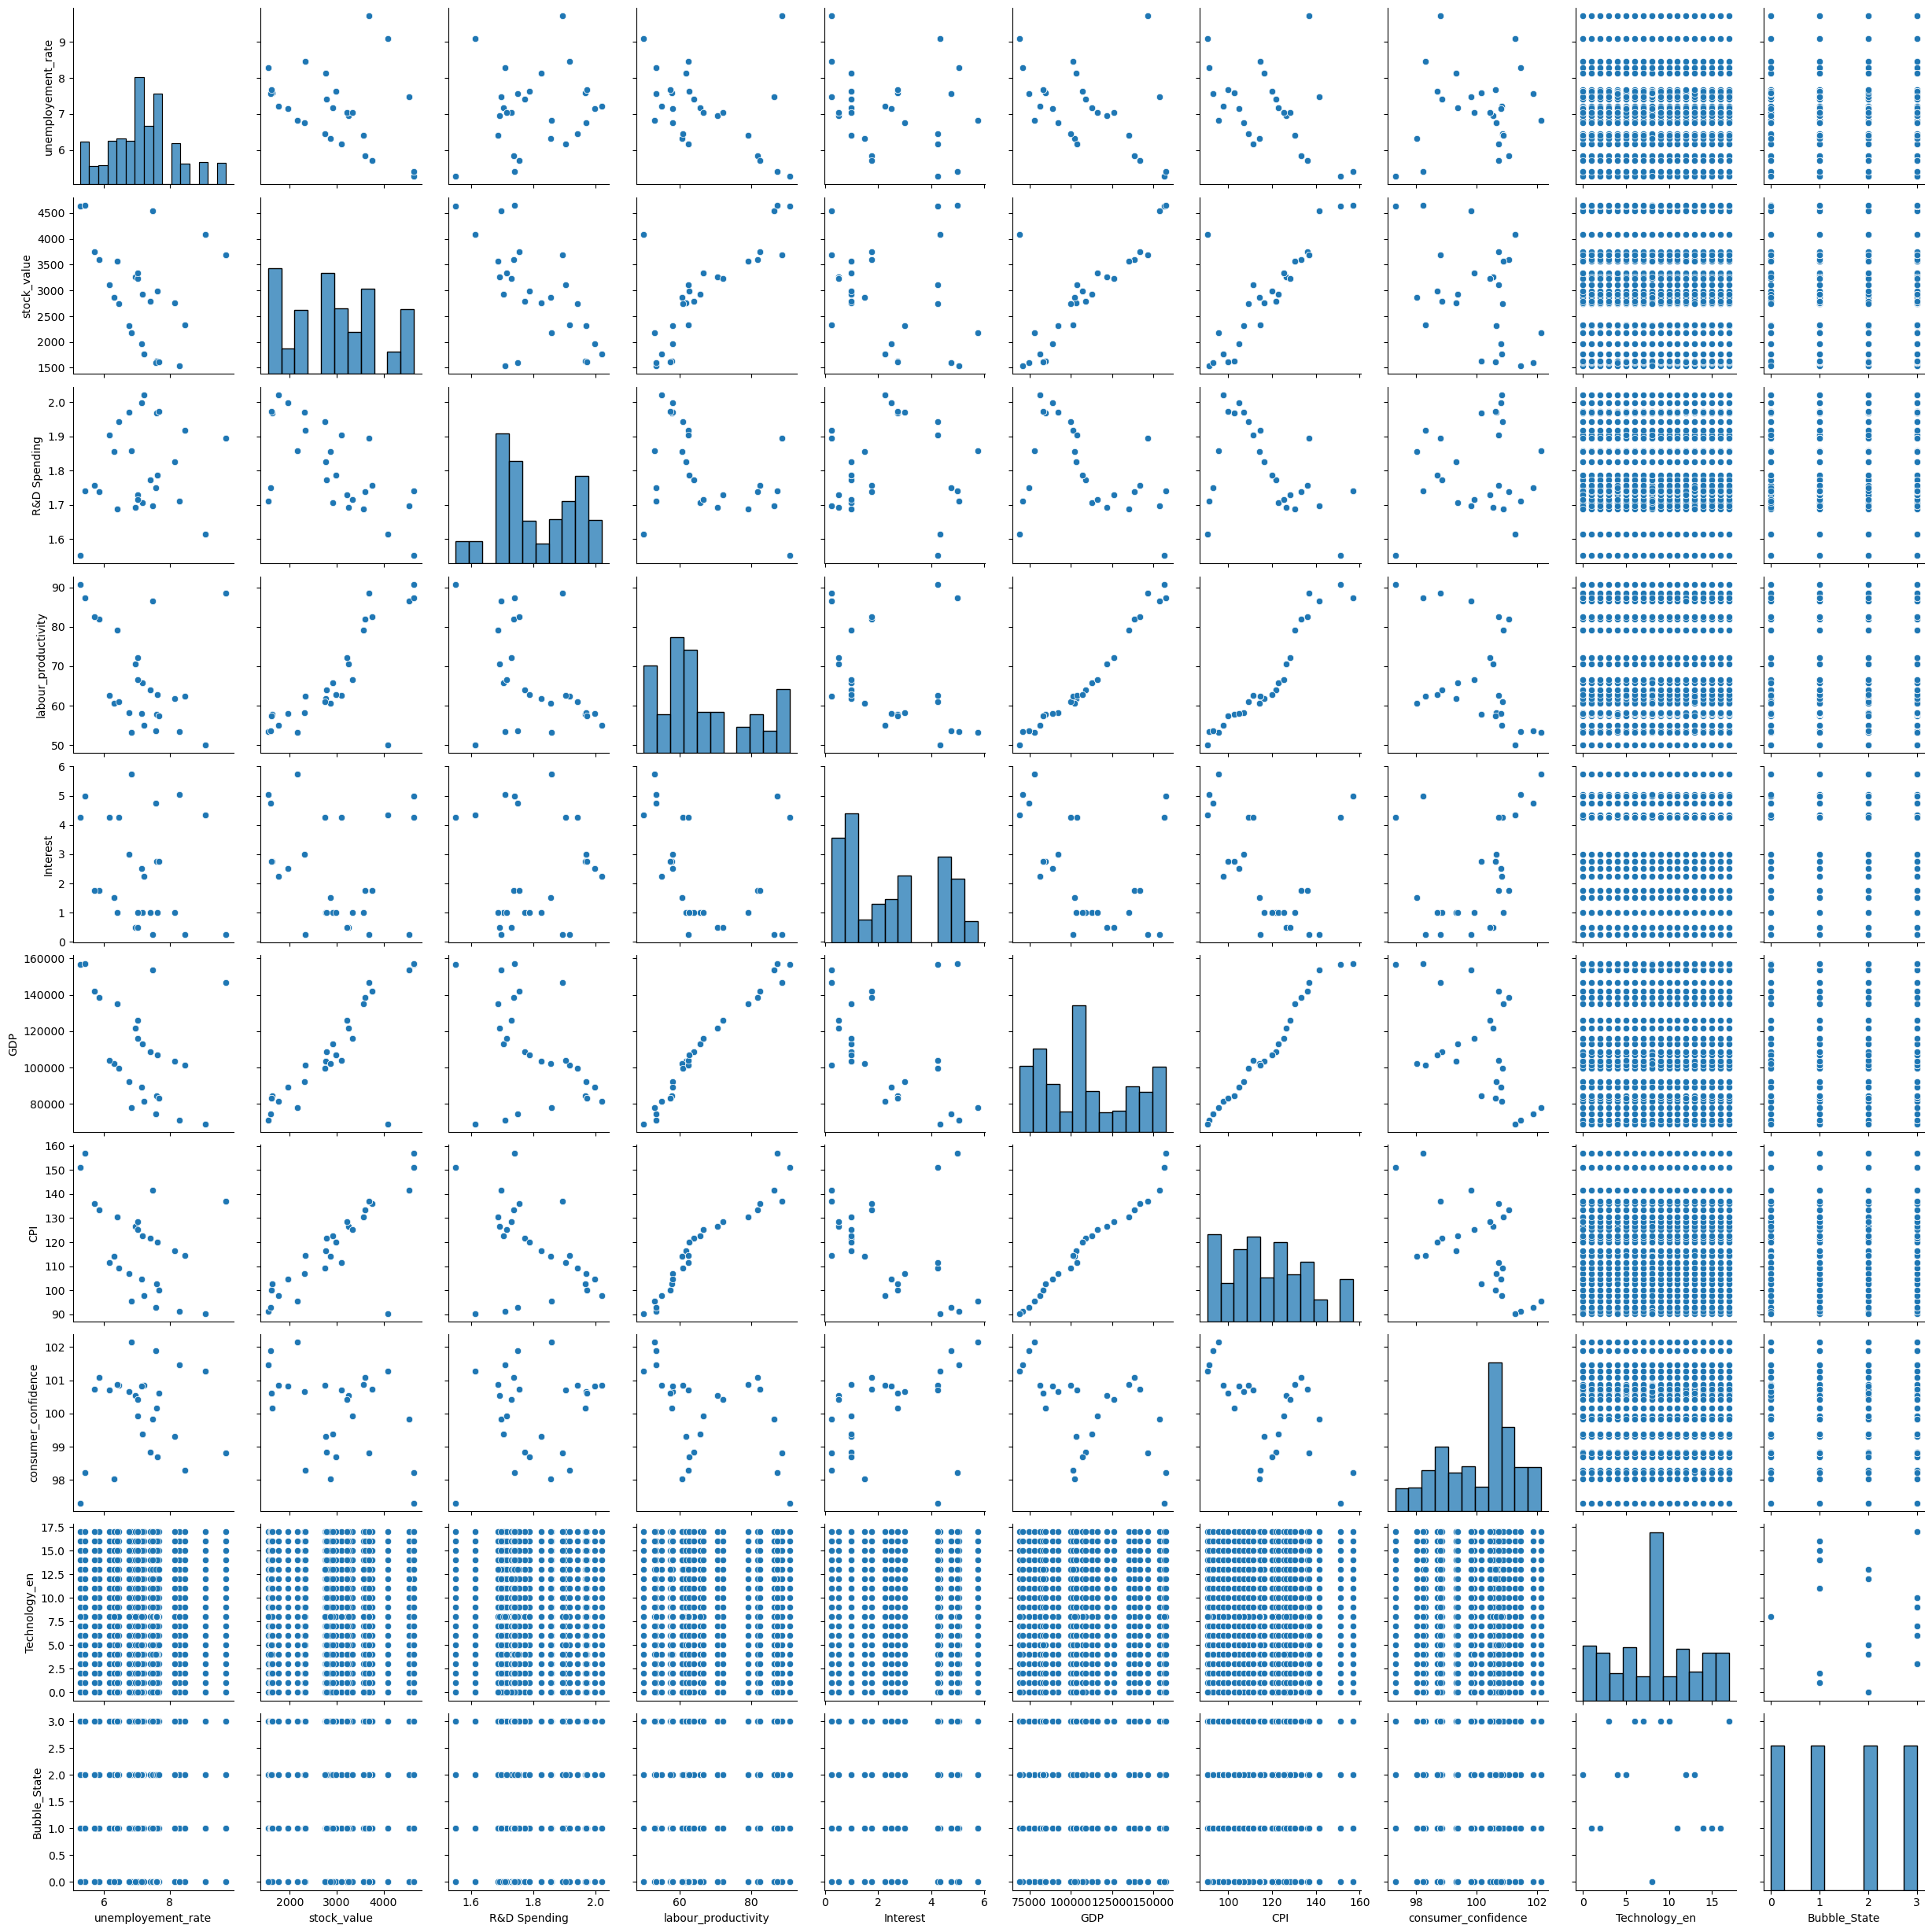

In [140]:
plt.figure(figsize=(5,5))
sns.pairplot(balanced_data)
plt.show()

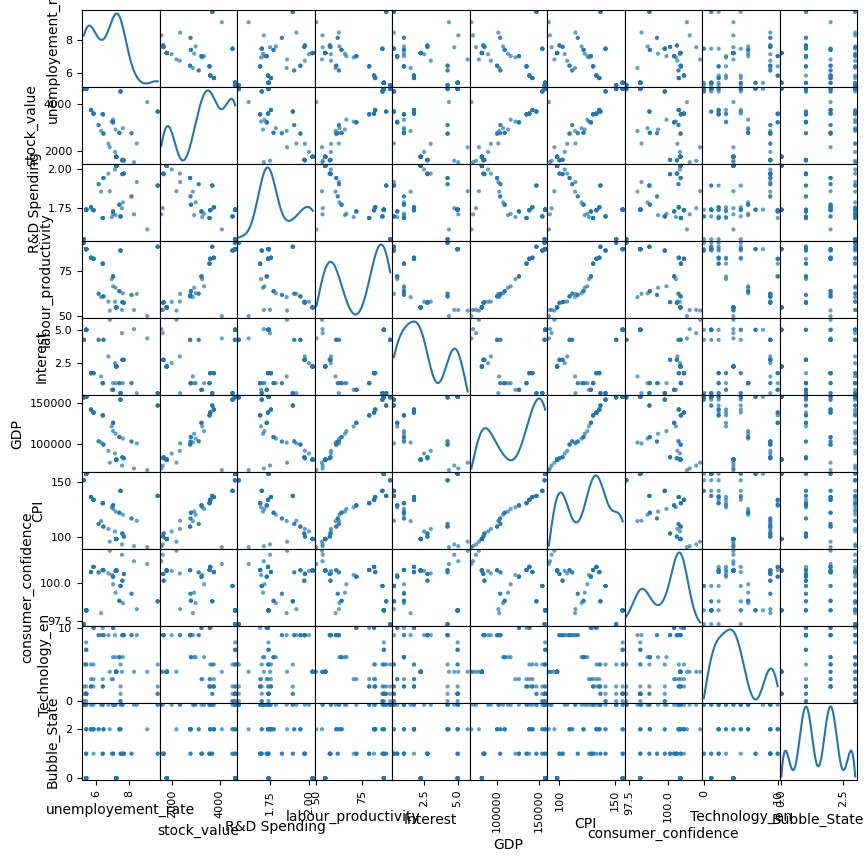

In [26]:
from pandas.plotting import scatter_matrix

# Scatter matrix plot
scatter_matrix(balanced_data, alpha=0.7, figsize=(10, 10), diagonal='kde')
plt.show()

In [168]:
balanced_data.drop(['Interest', 'unemployement_rate','consumer_confidence'],axis=1,inplace=True)

In [169]:
X = balanced_data.drop(['Bubble_State'], axis= 1)
y = balanced_data['Bubble_State']

In [170]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.15)

In [171]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X_train,y_train)
lg.score(X_test,y_test)

/Users/usmanali/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.4166666666666667

In [172]:
#Decision Tree
from sklearn import tree
dt_model=tree.DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
dt_score=dt_model.score(X_test,y_test)
print("Decision Tree model score:",dt_score)

Decision Tree model score: 0.9791666666666666


In [173]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest_model=RandomForestClassifier()
random_forest_model.fit(X_train,y_train)
random_forest_score=random_forest_model.score(X_test,y_test)
print("Random Forest Score is:",random_forest_score)

Random Forest Score is: 0.9375


In [174]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier()
knn_model.fit(X_train,y_train)
knn_score=knn_model.score(X_test,y_test)
print("KNN score:",knn_score)

KNN score: 0.7083333333333334


In [175]:
#Gradient Boost
from sklearn.ensemble import GradientBoostingClassifier
gradient_boost_model=GradientBoostingClassifier()
gradient_boost_model.fit(X_train,y_train)
gradient_boost_score=gradient_boost_model.score(X_test,y_test)
print("Gradient Boost Model Score:",gradient_boost_score)

Gradient Boost Model Score: 1.0


In [176]:
#XGBoost
import xgboost as xgb
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train,y_train)
xgb_score=xgb_model.score(X_test,y_test)
print("XG Boost score:",xgb_score)

XG Boost score: 1.0


In [177]:
#AdaBoost
from sklearn.ensemble import AdaBoostClassifier
adaboost_model=AdaBoostClassifier()
adaboost_model.fit(X_train,y_train)
adaboost_score=adaboost_model.score(X_test,y_test)
print('ADA boost model score:',adaboost_score)

ADA boost model score: 0.6458333333333334


In [37]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],         # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],        # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],        # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],          # Minimum number of samples required at each leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider for each split
    'bootstrap': [True, False],             # Whether bootstrap samples are used when building trees
    'class_weight': [None, 'balanced']      # Class weights to handle imbalance in the dataset
}

# Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(
    estimator=random_forest_model,
    param_grid=param_grid,
    cv=5,                      # 5-fold cross-validation
    scoring='accuracy',        # Use accuracy as the scoring metric
    verbose=1,                 # Print out progress
    n_jobs=-1                  # Use all available CPU cores
)

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Display the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(grid_search.best_score_))

# Evaluate the model on the test set with the best parameters
best_rf_classifier = grid_search.best_estimator_
rf_score = best_rf_classifier.score(X_test, y_test)
print("Random Forest test set accuracy:", rf_score)

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits


/Users/usmanali/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/usmanali/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/usmanali/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter 

/Users/usmanali/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/usmanali/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/usmanali/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter 

/Users/usmanali/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/usmanali/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/usmanali/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter 

/Users/usmanali/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/usmanali/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/usmanali/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter 

/Users/usmanali/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/usmanali/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/usmanali/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter 

/Users/usmanali/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/usmanali/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/usmanali/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter 

/Users/usmanali/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/usmanali/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/usmanali/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter 

/Users/usmanali/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/usmanali/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/usmanali/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter 

/Users/usmanali/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/usmanali/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/usmanali/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter 

/Users/usmanali/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/usmanali/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/usmanali/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter 

/Users/usmanali/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/usmanali/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/usmanali/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter 

/Users/usmanali/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/usmanali/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/usmanali/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter 

/Users/usmanali/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/usmanali/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/usmanali/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter 

/Users/usmanali/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/usmanali/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/usmanali/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter 

/Users/usmanali/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/usmanali/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/usmanali/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter 

/Users/usmanali/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/usmanali/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/usmanali/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter 

/Users/usmanali/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/usmanali/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/usmanali/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter 

/Users/usmanali/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/usmanali/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/usmanali/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter 

/Users/usmanali/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/usmanali/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/usmanali/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter 

/Users/usmanali/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/usmanali/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/usmanali/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter 

/Users/usmanali/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/usmanali/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/usmanali/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter 

/Users/usmanali/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/usmanali/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/usmanali/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter 

/Users/usmanali/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/usmanali/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/usmanali/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter 

/Users/usmanali/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/usmanali/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/usmanali/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter 

/Users/usmanali/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/usmanali/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/usmanali/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter 

/Users/usmanali/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/usmanali/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/usmanali/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter 

/Users/usmanali/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/usmanali/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/usmanali/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter 

/Users/usmanali/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/usmanali/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/usmanali/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter 

/Users/usmanali/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/usmanali/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/usmanali/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter 

/Users/usmanali/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/usmanali/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/usmanali/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter 

/Users/usmanali/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/usmanali/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/usmanali/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter 

/Users/usmanali/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/usmanali/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/usmanali/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter 

KeyboardInterrupt: 

In [179]:
import joblib
import pickle
joblib.dump(random_forest_model, 'tech_bubble_prediction_model_RF2.pkl')

['tech_bubble_prediction_model_RF2.pkl']

In [69]:
def random_forest(stock_value, RD_spendings, labour_product, gdp_value, cpi_value, technology):
    Random_Forest_model1 = joblib.load('tech_bubble_prediction_model_RF1.pkl')
    Random_Forest_model = joblib.load('tech_bubble_prediction_model_RF.pkl')
    
    technology_types = {'Internet' : 4, 'Social Media': 9, 'Mobile Technology': 6, 'Blockchain': 3,
           'Virtual Reality': 10, 'Augmented Reality': 2, 'Internet of Things': 5, 'AI': 1,
           '5G Technology': 0, 'Quantum Computing': 7,
           'Renewable Energy Tech': 8}
    bubble_state = {2: 'Full Bubble', 3: 'Growing Bubble', 0: 'Bubble Burst', 1: 'Emerging Bubble'}

    values = {
        'stock_value': [stock_value],
        'R&D Spending': [RD_spendings],
        'labour_productivity': [labour_product],
        'GDP': [gdp_value],
        'CPI': [cpi_value],
        'Technology_en': [technology]
    }
    predicted_data = pd.DataFrame(data = values)
    if stock_value < 4742:
        Bubble_condition = Random_Forest_model.predict(predicted_data)[0]
    else:
        Bubble_condition = Rondom_Forest_model1.predict(predicted_data)[0]
    bubble = bubble_state[Bubble_condition]
    print("is ",bubble)

In [106]:
Random_Forest_model = joblib.load('tech_bubble_prediction_model_RF2.pkl')

technology_types = {'Internet' : 4, 'Social Media': 9, 'Mobile Technology': 6, 'Blockchain': 3,
       'Virtual Reality': 10, 'Augmented Reality': 2, 'Internet of Things': 5, 'AI': 1,
       '5G Technology': 0, 'Quantum Computing': 7,
       'Renewable Energy Tech': 8}
bubble_state = {2: 'Full Bubble', 3: 'Growing Bubble', 0: 'Bubble Burst', 1: 'Emerging Bubble'}

stock_value = float(input("Enter the Stock Index: "))
RD_value = float(input("Enter the R&D spending index: "))
Labour_Product_value = float(input("Enter the Labour Productivity Level: "))
GDP_value = float(input("Enter the GDP in Millions: "))
CPI = float(input("Enter the CPI index: "))
Tech_value = input("Enter the Technology type you want to check for Bubble: ")
Tech_type = technology_types[Tech_value]

values = {
    'stock_value': [stock_value],
    'R&D Spending': [RD_value],
    'labour_productivity': [Labour_Product_value],
    'GDP': [GDP_value],
    'CPI': [CPI],
    'Technology_en': [Tech_type]
}
predicted_data = pd.DataFrame(data = values)

Bubble_condition = Random_Forest_model.predict(predicted_data)[0]
bubble = bubble_state[Bubble_condition]
print(Tech_value, "is ",bubble)

Enter the Stock Index: 3999
Enter the R&D spending index: 2999
Enter the Labour Productivity Level: 4999
Enter the GDP in Millions: 288
Enter the CPI index: 4999
Enter the Technology type you want to check for Bubble: AI
AI is  Emerging Bubble


In [ ]:
Random_Forest_model.predict(predicted_data)[0]
bubble = bubble_state[Bubble_condition]
print(Tech_value, "is",bubble)

In [73]:
Random_Forest_model = joblib.load('tech_bubble_prediction_model_RF.pkl')
random_forest(4649.78, 1.740393, 87.3, 157319.500000, 157.1, 1)

is  Full Bubble


In [193]:
#New technologies
Random_Forest_model = joblib.load('tech_bubble_prediction_model_RF2.pkl')

technology_types = {'ATM Machines': 1, 'Credit Card Processing Systems': 4, 'Online Banking': 7,
       'Mobile Banking Apps': 6, 'Blockchain': 2, 'Quantum Computing': 8, 'AI' :0,
       'Clound Banking': 3, 'Robotic Process Automation': 9, 'Digital Wallets' : 5}

bubble_state = {2: 'Established', 1: 'Emerging', 3: 'Growing', 0: 'Decline'}

stock_value = float(input("Enter the Stock Index: "))
RD_value = float(input("Enter the R&D spending index: "))
Labour_Product_value = float(input("Enter the Labour Productivity Level: "))
GDP_value = float(input("Enter the GDP in Millions: "))
CPI = float(input("Enter the CPI index: "))
Tech_value = input("Enter the Technology type you want to check for Bubble: ")
Tech_type = technology_types[Tech_value]

values = {
    'stock_value': [stock_value],
    'R&D Spending': [RD_value],
    'labour_productivity': [Labour_Product_value],
    'GDP': [GDP_value],
    'CPI': [CPI],
    'Technology_en': [Tech_type]
}
predicted_data = pd.DataFrame(data = values)

Bubble_condition = Random_Forest_model.predict(predicted_data)[0]
bubble = bubble_state[Bubble_condition]
print(Tech_value, "is ",bubble)

Enter the Stock Index: 444
Enter the R&D spending index: 344
Enter the Labour Productivity Level: 222
Enter the GDP in Millions: 444
Enter the CPI index: 23
Enter the Technology type you want to check for Bubble: AI
AI is  Established
